### Stochastic SIR model


In [ ]:
import numpy as np
import random as rdm

# Create a Poisson distribution using the discrete event method

gamma=1
N=0
t0=0
tf = 3

times=[t0]

t=t0
while (t<tf):
    t += np.random.exponential(1/gamma)

    # "Manual" way to calculate the random sample (from a uniform random number)
    # t += -np.log(rdm.random())/gamma
    N += 1
    times.append(t)


In [ ]:
import matplotlib.pyplot as plt;

# Plot the Poisson distribution obtained

ntimes = len(times)
events = np.linspace(0,N,ntimes)


x=[0]
y=[0]

N=0
for i in range(ntimes):
    x += [times[i],times[i]]
    y += [N, N+1]
    N +=1

    plt.plot([times[i],times[i]], [0,N], '--k', linewidth='0.5');
    plt.plot([0,times[i]], [N,N], '--k', linewidth='0.5');
    


# plt.plot(times, events);
plt.plot(x,y);

##### The following simulates a Poisson distribution using the **$\tau$-leaping method**.

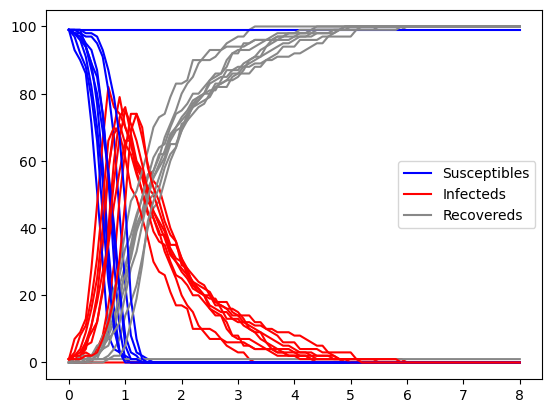

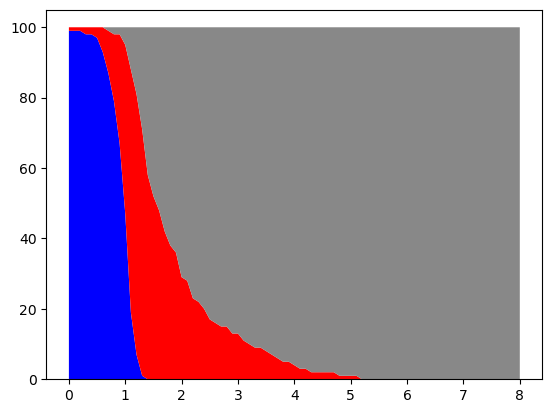

In [51]:
import numpy as np
import random as rdm
import matplotlib.pyplot as plt;


# Create a Poisson distribution using the tau-leaping method

gamma=1
beta=0.1
tf = 8
dt=0.1
Nt = int(tf/dt)+1
time = np.linspace(0,tf,Nt)

nsamples = 10

def SIR(S0, I0, R0):
    Pop = np.zeros([Nt, 3])
    Pop[0] = np.array([S0,I0,R0])

    for i in range(Nt-1):
        S = Pop[i,0]
        I = Pop[i,1]
        R = Pop[i,2]
        P_S2I = np.random.binomial(S, dt*beta*I)
        P_I2R = np.random.binomial(I, dt*gamma)

        S -= P_S2I
        I += P_S2I - P_I2R
        R += P_I2R

        Pop[i+1] = np.array([S,I,R])

    return Pop


for sample in range(nsamples):
    S0 = 99
    I0 = 1
    R0 = 0

    Pop = SIR(S0,I0,R0)

    plt.plot(time, Pop[:,0],'b', time, Pop[:,1],'r', time, Pop[:,2],'#888888');

plt.legend(['Susceptibles','Infecteds','Recovereds']);
plt.savefig('SIR-stochastic1.png')


figure, axis = plt.subplots(1);
axis.stackplot(time, Pop[:,0], Pop[:,1], Pop[:,2],colors=['b','r','#888888']);
plt.savefig('SIR-stochastic2.png')